### 1.Inspiration /Problem Statement:The goal is to use best model that forecasts the Min and Max temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Temperature-Forecast-Project")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
df=pd.read_csv("temperature.csv")
pd.set_option('display.max_columns',None)
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

#### Dimensionality Check

In [4]:
df.shape

(7752, 25)

##### Observation:The dataset consist of 7752 observations of 25 columns.

In [5]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df=df

#### Variables/Features of the Dataset

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

#### Observation:The dataset contains of the information about Temperature in shortforms,we will rename the column name in data ceaning process for a better understanding.

### 3.Preprocessing data

* Renaming All Column names into full column names for better Understanding
* Checking Missing Values
* Data Description

#### Renaming All Column names into full column names for better Understanding

In [7]:
df.rename(columns={'station':'Used_Weather_Station', 'Date':'Date_of_Observation', 'Present_Tmax':'Present_Max_Temp', 'Present_Tmin':'Present_Min_Temp', 'LDAPS_RHmin':'LDAPS_Min_Relative_Humidity',
       'LDAPS_RHmax':'LDAPS_Max_Relative_Humidity', 'LDAPS_Tmax_lapse':'LDAPS_Max_Lapse_Temp', 'LDAPS_Tmin_lapse':'LDAPS_Min_Lapse_Temp', 'LDAPS_WS':'LDAPS_Wind_Speed',
       'LDAPS_LH':'LDAPS_Latent_Heat', 'LDAPS_CC1':'LDAPS_Cloud_Cover_1', 'LDAPS_CC2':'LDAPS_Cloud_Cover_2', 'LDAPS_CC3':'LDAPS_Cloud_Cover_3', 'LDAPS_CC4':'LDAPS_Cloud_Cover_4',
       'LDAPS_PPT1':'LDAPS_Avg_Percipitation_1', 'LDAPS_PPT2':'LDAPS_Avg_Percipitation_2', 'LDAPS_PPT3':'LDAPS_Avg_Percipitation_3', 'LDAPS_PPT4':'LDAPS_Avg_Percipitation_4', 'lat':'Latitude', 'lon':'Longitude',
       'DEM':'Elevation', 'Slope':'Slope_Range', 'Solar radiation':'Incoming_Solar_Radiation', 'Next_Tmax':'Next_Max_Temp', 'Next_Tmin':'Next_Min_Temp'}, 
                 inplace=True)

In [8]:
df.head()

Used_Weather_Station Date_of_Observation  Present_Max_Temp  \
0                   1.0          30-06-2013              28.7   
1                   2.0          30-06-2013              31.9   
2                   3.0          30-06-2013              31.6   
3                   4.0          30-06-2013              32.0   
4                   5.0          30-06-2013              31.4   

   Present_Min_Temp  LDAPS_Min_Relative_Humidity  LDAPS_Max_Relative_Humidity  \
0              21.4                    58.255688                    91.116364   
1              21.6                    52.263397                    90.604721   
2              23.3                    48.690479                    83.973587   
3              23.4                    58.239788                    96.483688   
4              21.9                    56.174095                    90.155128   

   LDAPS_Max_Lapse_Temp  LDAPS_Min_Lapse_Temp  LDAPS_Wind_Speed  \
0             28.074101             23.006936          6.818887   
1             29.850689             24.035009          5.691890   
2             30.091292             24.565633          6.138224   
3             29.704629             23.326177          5.650050   
4             29.113934             23.486480          5.735004   

   LDAPS_Latent_Heat  LDAPS_Cloud_Cover_1  LDAPS_Cloud_Cover_2  \
0          69.451805             0.233947             0.203896   
1          51.937448             0.225508             0.251771   
2          20.573050             0.209344             0.257469   
3          65.727144             0.216372             0.226002   
4         107.965535             0.151407             0.249995   

   LDAPS_Cloud_Cover_3  LDAPS_Cloud_Cover_4  LDAPS_Avg_Percipitation_1  \
0             0.161697             0.130928                        0.0   
1             0.159444             0.127727                        0.0   
2             0.204091             0.142125                        0.0   
3             0.161157             0.134249                        0.0   
4             0.178892             0.170021                        0.0   

   LDAPS_Avg_Percipitation_2  LDAPS_Avg_Percipitation_3  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   LDAPS_Avg_Percipitation_4  Latitude  Longitude  Elevation  Slope_Range  \
0                        0.0   37.6046    126.991   212.3350       2.7850   
1                        0.0   37.6046    127.032    44.7624       0.5141   
2                        0.0   37.5776    127.058    33.3068       0.2661   
3                        0.0   37.6450    127.022    45.7160       2.5348   
4                        0.0   37.5507    127.135    35.0380       0.5055   

   Incoming_Solar_Radiation  Next_Max_Temp  Next_Min_Temp  
0               5992.895996           29.1           21.2  
1               5869.312500           30.5           22.5  
2               5863.555664           31.1           23.9  
3               5856.964844           31.7           24.3  
4               5859.552246           31.2           22.5

### Data Overview Using Pandas Profiling for quick review on EDA

In [75]:
pp.ProfileReport(df)

#### Checking Missing Values

In [9]:
df.isnull().sum()

Used_Weather_Station            2
Date_of_Observation             2
Present_Max_Temp               70
Present_Min_Temp               70
LDAPS_Min_Relative_Humidity    75
LDAPS_Max_Relative_Humidity    75
LDAPS_Max_Lapse_Temp           75
LDAPS_Min_Lapse_Temp           75
LDAPS_Wind_Speed               75
LDAPS_Latent_Heat              75
LDAPS_Cloud_Cover_1            75
LDAPS_Cloud_Cover_2            75
LDAPS_Cloud_Cover_3            75
LDAPS_Cloud_Cover_4            75
LDAPS_Avg_Percipitation_1      75
LDAPS_Avg_Percipitation_2      75
LDAPS_Avg_Percipitation_3      75
LDAPS_Avg_Percipitation_4      75
Latitude                        0
Longitude                       0
Elevation                       0
Slope_Range                     0
Incoming_Solar_Radiation        0
Next_Max_Temp                  27
Next_Min_Temp                  27
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

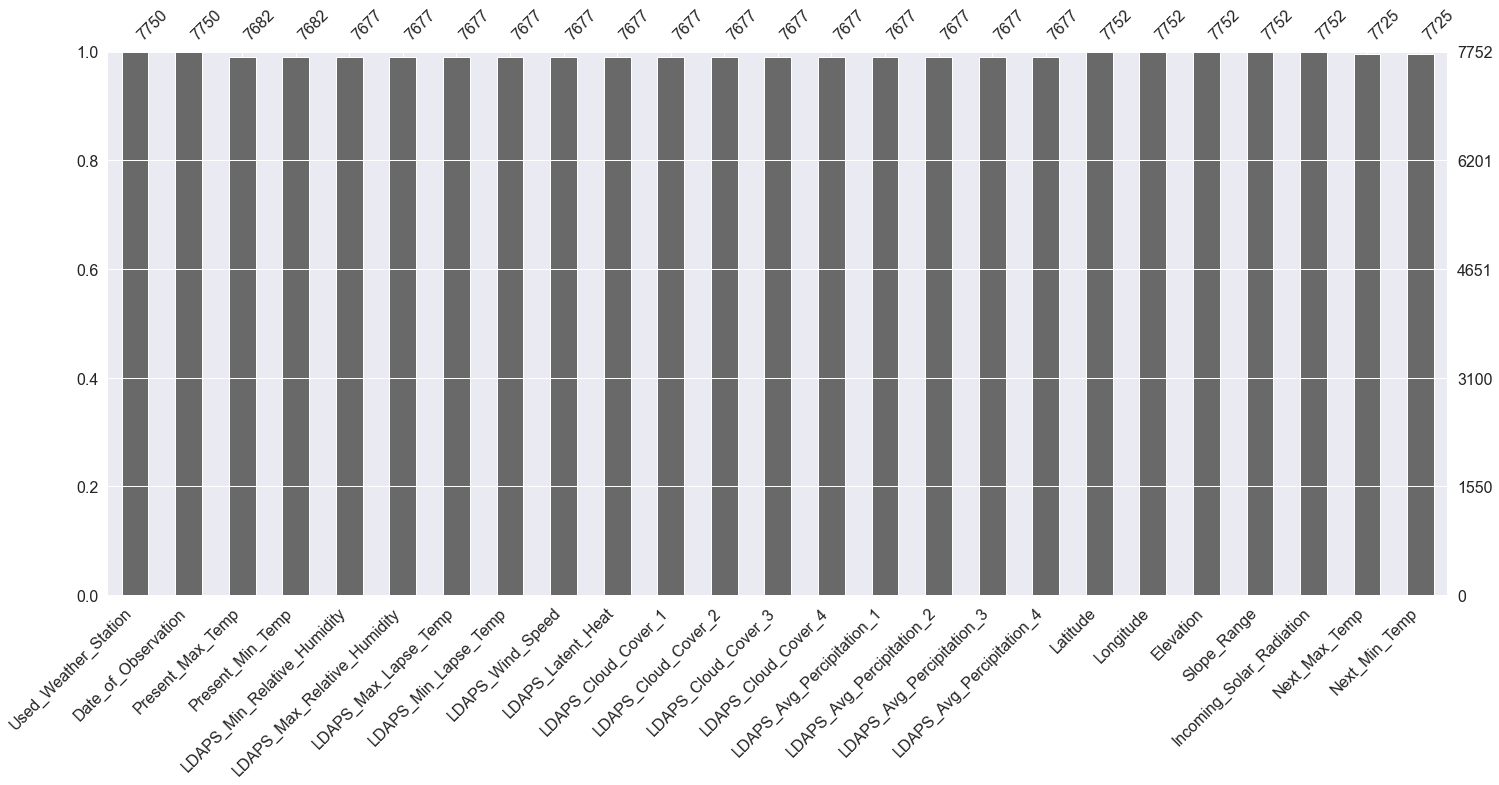

In [10]:
import missingno as msno
msno.bar(df)
plt.show

#### Observation: We can see that some of the columns consists of Missing values which needs to be dealt with.

In [11]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

In [12]:
df.isnull().sum()

Used_Weather_Station           0
Date_of_Observation            2
Present_Max_Temp               0
Present_Min_Temp               0
LDAPS_Min_Relative_Humidity    0
LDAPS_Max_Relative_Humidity    0
LDAPS_Max_Lapse_Temp           0
LDAPS_Min_Lapse_Temp           0
LDAPS_Wind_Speed               0
LDAPS_Latent_Heat              0
LDAPS_Cloud_Cover_1            0
LDAPS_Cloud_Cover_2            0
LDAPS_Cloud_Cover_3            0
LDAPS_Cloud_Cover_4            0
LDAPS_Avg_Percipitation_1      0
LDAPS_Avg_Percipitation_2      0
LDAPS_Avg_Percipitation_3      0
LDAPS_Avg_Percipitation_4      0
Latitude                       0
Longitude                      0
Elevation                      0
Slope_Range                    0
Incoming_Solar_Radiation       0
Next_Max_Temp                  0
Next_Min_Temp                  0
dtype: int64

In [13]:
df.dropna(axis = 0, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Used_Weather_Station         7750 non-null   float64
 1   Date_of_Observation          7750 non-null   object 
 2   Present_Max_Temp             7750 non-null   float64
 3   Present_Min_Temp             7750 non-null   float64
 4   LDAPS_Min_Relative_Humidity  7750 non-null   float64
 5   LDAPS_Max_Relative_Humidity  7750 non-null   float64
 6   LDAPS_Max_Lapse_Temp         7750 non-null   float64
 7   LDAPS_Min_Lapse_Temp         7750 non-null   float64
 8   LDAPS_Wind_Speed             7750 non-null   float64
 9   LDAPS_Latent_Heat            7750 non-null   float64
 10  LDAPS_Cloud_Cover_1          7750 non-null   float64
 11  LDAPS_Cloud_Cover_2          7750 non-null   float64
 12  LDAPS_Cloud_Cover_3          7750 non-null   float64
 13  LDAPS_Cloud_Cover_

In [15]:
df.isnull().sum()

Used_Weather_Station           0
Date_of_Observation            0
Present_Max_Temp               0
Present_Min_Temp               0
LDAPS_Min_Relative_Humidity    0
LDAPS_Max_Relative_Humidity    0
LDAPS_Max_Lapse_Temp           0
LDAPS_Min_Lapse_Temp           0
LDAPS_Wind_Speed               0
LDAPS_Latent_Heat              0
LDAPS_Cloud_Cover_1            0
LDAPS_Cloud_Cover_2            0
LDAPS_Cloud_Cover_3            0
LDAPS_Cloud_Cover_4            0
LDAPS_Avg_Percipitation_1      0
LDAPS_Avg_Percipitation_2      0
LDAPS_Avg_Percipitation_3      0
LDAPS_Avg_Percipitation_4      0
Latitude                       0
Longitude                      0
Elevation                      0
Slope_Range                    0
Incoming_Solar_Radiation       0
Next_Max_Temp                  0
Next_Min_Temp                  0
dtype: int64

#### Data Description

In [16]:
df.describe().T

count         mean         std          min  \
Used_Weather_Station         7750.0    13.000000    7.211568     1.000000   
Present_Max_Temp             7750.0    29.769652    2.953542    20.000000   
Present_Min_Temp             7750.0    23.227316    2.398383    11.300000   
LDAPS_Min_Relative_Humidity  7750.0    56.742104   14.586073    19.794666   
LDAPS_Max_Relative_Humidity  7750.0    88.390831    7.150356    58.936283   
LDAPS_Max_Lapse_Temp         7750.0    29.614712    2.928370    17.624954   
LDAPS_Min_Lapse_Temp         7750.0    23.515389    2.331006    14.272646   
LDAPS_Wind_Speed             7750.0     7.091188    2.167185     2.882580   
LDAPS_Latent_Heat            7750.0    62.440791   33.520913   -13.603212   
LDAPS_Cloud_Cover_1          7750.0     0.368230    0.261148     0.000000   
LDAPS_Cloud_Cover_2          7750.0     0.355625    0.256752     0.000000   
LDAPS_Cloud_Cover_3          7750.0     0.317819    0.249099     0.000000   
LDAPS_Cloud_Cover_4          7750.0     0.298451    0.253104     0.000000   
LDAPS_Avg_Percipitation_1    7750.0     0.583360    1.919557     0.000000   
LDAPS_Avg_Percipitation_2    7750.0     0.477644    1.738607     0.000000   
LDAPS_Avg_Percipitation_3    7750.0     0.273535    1.143042     0.000000   
LDAPS_Avg_Percipitation_4    7750.0     0.264721    1.186283     0.000000   
Latitude                     7750.0    37.544720    0.050335    37.456200   
Longitude                    7750.0   126.991400    0.079406   126.826000   
Elevation                    7750.0    61.854944   54.256953    12.370000   
Slope_Range                  7750.0     1.256692    1.369833     0.098500   
Incoming_Solar_Radiation     7750.0  5341.549330  428.996445  4329.520508   
Next_Max_Temp                7750.0    30.276219    3.118022    17.400000   
Next_Min_Temp                7750.0    22.933419    2.478871    11.300000   

                                     25%          50%          75%  \
Used_Weather_Station            7.000000    13.000000    19.000000   
Present_Max_Temp               27.800000    29.900000    32.000000   
Present_Min_Temp               21.700000    23.400000    24.875000   
LDAPS_Min_Relative_Humidity    46.048225    55.039024    67.032715   
LDAPS_Max_Relative_Humidity    84.318649    89.793480    93.703491   
LDAPS_Max_Lapse_Temp           27.693733    29.703426    31.682567   
LDAPS_Min_Lapse_Temp           22.115268    23.760199    25.133460   
LDAPS_Wind_Speed                5.686498     6.547470     8.005363   
LDAPS_Latent_Heat              37.547426    56.865482    83.891182   
LDAPS_Cloud_Cover_1             0.148339     0.315697     0.571665   
LDAPS_Cloud_Cover_2             0.142424     0.312421     0.554910   
LDAPS_Cloud_Cover_3             0.103113     0.262555     0.493971   
LDAPS_Cloud_Cover_4             0.082777     0.227664     0.497218   
LDAPS_Avg_Percipitation_1       0.000000     0.000000     0.049102   
LDAPS_Avg_Percipitation_2       0.000000     0.000000     0.016720   
LDAPS_Avg_Percipitation_3       0.000000     0.000000     0.007199   
LDAPS_Avg_Percipitation_4       0.000000     0.000000     0.000000   
Latitude                       37.510200    37.550700    37.577600   
Longitude                     126.937000   126.995000   127.042000   
Elevation                      28.700000    45.716000    59.832400   
Slope_Range                     0.271300     0.618000     1.767800   
Incoming_Solar_Radiation     4999.018555  5436.345215  5728.316406   
Next_Max_Temp                  28.200000    30.500000    32.600000   
Next_Min_Temp                  21.400000    23.100000    24.600000   

                                     max  
Used_Weather_Station           25.000000  
Present_Max_Temp               37.600000  
Present_Min_Temp               29.900000  
LDAPS_Min_Relative_Humidity    98.524734  
LDAPS_Max_Relative_Humidity   100.000153  
LDAPS_Max_Lapse_Temp           38.542255  
LDAPS_Min_Lapse_Temp           29.619342  
LDAPS_Win

#### Observation: Maximum Present Temperature Observed as per data collected is 37 °C & Minimum Present Temperature Observed as per data collected is 11.3 °C.

In [17]:
# Changing datatype from Float to datetime
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [18]:
for i in ['Date_of_Observation']:
    change_into_datetime(i)

In [19]:
df.dtypes

Used_Weather_Station                  float64
Date_of_Observation            datetime64[ns]
Present_Max_Temp                      float64
Present_Min_Temp                      float64
LDAPS_Min_Relative_Humidity           float64
LDAPS_Max_Relative_Humidity           float64
LDAPS_Max_Lapse_Temp                  float64
LDAPS_Min_Lapse_Temp                  float64
LDAPS_Wind_Speed                      float64
LDAPS_Latent_Heat                     float64
LDAPS_Cloud_Cover_1                   float64
LDAPS_Cloud_Cover_2                   float64
LDAPS_Cloud_Cover_3                   float64
LDAPS_Cloud_Cover_4                   float64
LDAPS_Avg_Percipitation_1             float64
LDAPS_Avg_Percipitation_2             float64
LDAPS_Avg_Percipitation_3             float64
LDAPS_Avg_Percipitation_4             float64
Latitude                              float64
Longitude                             float64
Elevation                             float64
Slope_Range                       

* Now ,we can extract the day and the month data from Date_of_Observation column.
* Then there will be no use of 'Date_of_Observation' column after extracting day & month data,so we can drop it

In [20]:
# Extracting Day,Month,Year data from Date_of_Observation column.
df['Observation_day']=df['Date_of_Observation'].dt.day
df['Observation_month']=df['Date_of_Observation'].dt.month
df['Observation_year']=df['Date_of_Observation'].dt.year

In [21]:
#Dropping  Date_of_Observation column as it has duplicate data
df.drop('Date_of_Observation', axis=1, inplace=True)

In [22]:
df.head()

Used_Weather_Station  Present_Max_Temp  Present_Min_Temp  \
0                   1.0              28.7              21.4   
1                   2.0              31.9              21.6   
2                   3.0              31.6              23.3   
3                   4.0              32.0              23.4   
4                   5.0              31.4              21.9   

   LDAPS_Min_Relative_Humidity  LDAPS_Max_Relative_Humidity  \
0                    58.255688                    91.116364   
1                    52.263397                    90.604721   
2                    48.690479                    83.973587   
3                    58.239788                    96.483688   
4                    56.174095                    90.155128   

   LDAPS_Max_Lapse_Temp  LDAPS_Min_Lapse_Temp  LDAPS_Wind_Speed  \
0             28.074101             23.006936          6.818887   
1             29.850689             24.035009          5.691890   
2             30.091292             24.565633          6.138224   
3             29.704629             23.326177          5.650050   
4             29.113934             23.486480          5.735004   

   LDAPS_Latent_Heat  LDAPS_Cloud_Cover_1  LDAPS_Cloud_Cover_2  \
0          69.451805             0.233947             0.203896   
1          51.937448             0.225508             0.251771   
2          20.573050             0.209344             0.257469   
3          65.727144             0.216372             0.226002   
4         107.965535             0.151407             0.249995   

   LDAPS_Cloud_Cover_3  LDAPS_Cloud_Cover_4  LDAPS_Avg_Percipitation_1  \
0             0.161697             0.130928                        0.0   
1             0.159444             0.127727                        0.0   
2             0.204091             0.142125                        0.0   
3             0.161157             0.134249                        0.0   
4             0.178892             0.170021                        0.0   

   LDAPS_Avg_Percipitation_2  LDAPS_Avg_Percipitation_3  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   LDAPS_Avg_Percipitation_4  Latitude  Longitude  Elevation  Slope_Range  \
0                        0.0   37.6046    126.991   212.3350       2.7850   
1                        0.0   37.6046    127.032    44.7624       0.5141   
2                        0.0   37.5776    127.058    33.3068       0.2661   
3                        0.0   37.6450    127.022    45.7160       2.5348   
4                        0.0   37.5507    127.135    35.0380       0.5055   

   Incoming_Solar_Radiation  Next_Max_Temp  Next_Min_Temp  Observation_day  \
0               5992.895996           29.1           21.2               30   
1               5869.312500           30.5           22.5               30   
2               5863.555664           31.1           23.9               30   
3               5856.964844           31.7           24.3               30   
4               5859.552246           31.2           22.5               30   

   Observation_month  Observation_year  
0                  6              2013  
1                  6              2013  
2                  6              2013  
3                  6              2013  
4                  6              2013

2015    1550
2014    1550
2017    1550
2013    1550
2016    1550
Name: Observation_year, dtype: int64


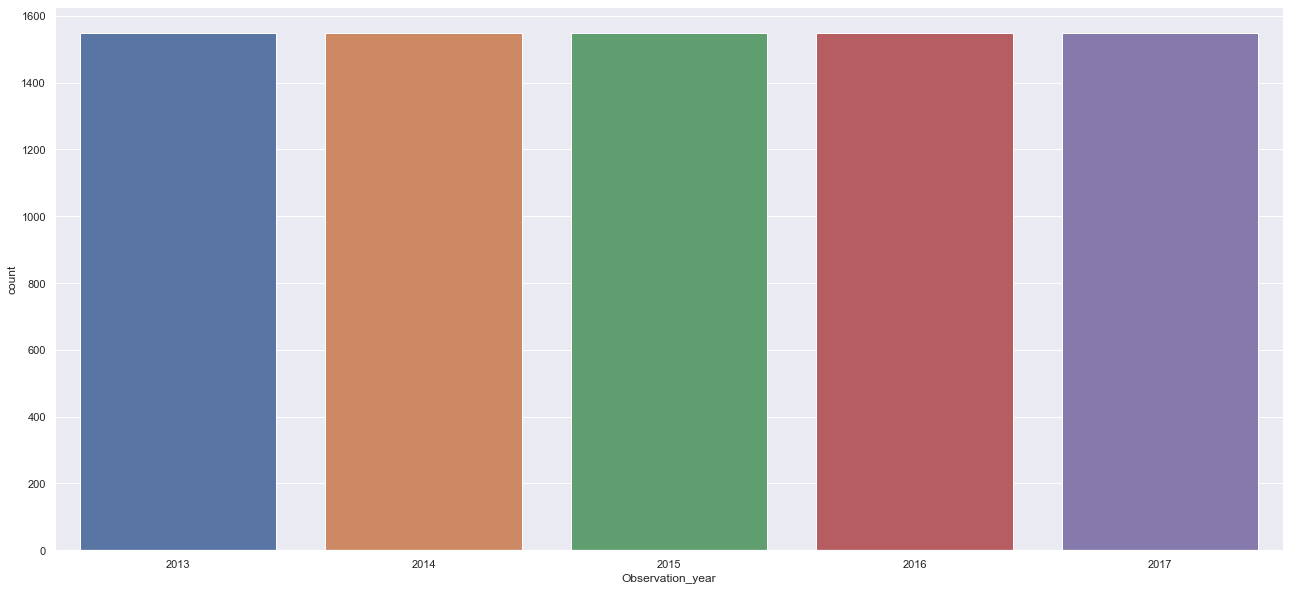

In [23]:
# YEAR Data Plot
print(df['Observation_year'].value_counts())
plt.figure(figsize=(22,10))
sn.countplot(df['Observation_year'])
plt.show()

#### Observation: We can see that the data is uniformly Distributed across all day month and year.

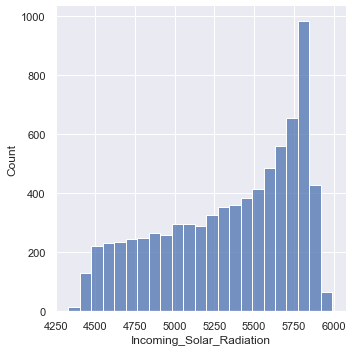

In [24]:
sn.displot(df['Incoming_Solar_Radiation'])

#### Observation: We can see that highest Solar_Radiation lies between the range 5750-6000

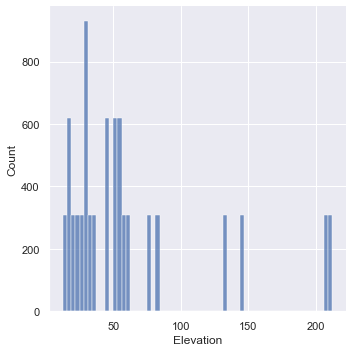

In [25]:
sn.displot(df['Elevation'])

#### Observation: We can see that most of the elevation data lies between range 0-50 and the highest elevation level 200+

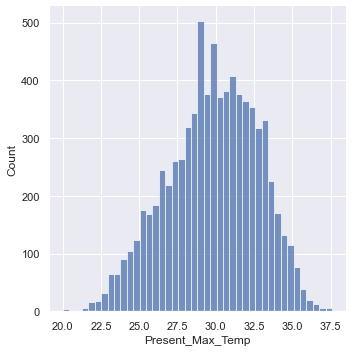

In [26]:
sn.displot(df['Present_Max_Temp'])

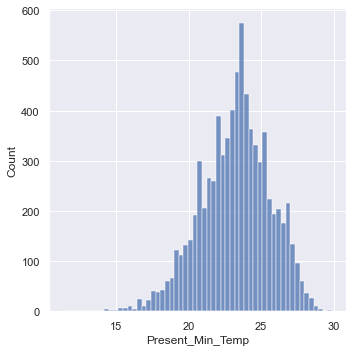

In [27]:
sn.displot(df['Present_Min_Temp'])

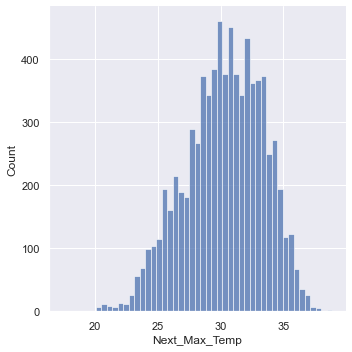

In [28]:
sn.displot(df['Next_Max_Temp'])

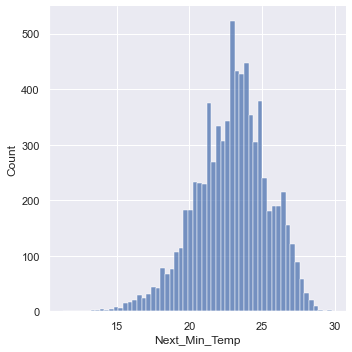

In [29]:
sn.displot(df['Next_Min_Temp'])

<AxesSubplot:xlabel='Present_Max_Temp', ylabel='Next_Max_Temp'>

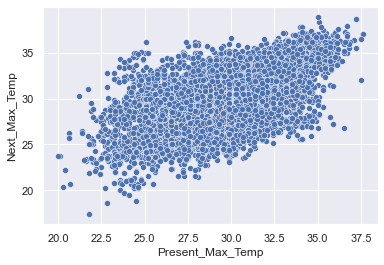

In [30]:
sn.scatterplot(data=df, x="Present_Max_Temp", y="Next_Max_Temp") 

<AxesSubplot:xlabel='Present_Min_Temp', ylabel='Next_Min_Temp'>

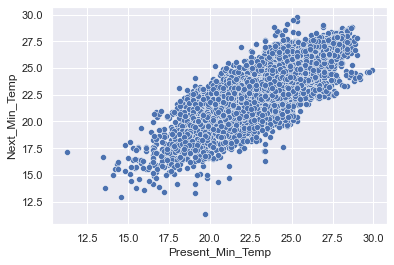

In [31]:
sn.scatterplot(data=df, x="Present_Min_Temp", y="Next_Min_Temp") 

<AxesSubplot:xlabel='LDAPS_Max_Relative_Humidity', ylabel='Next_Max_Temp'>

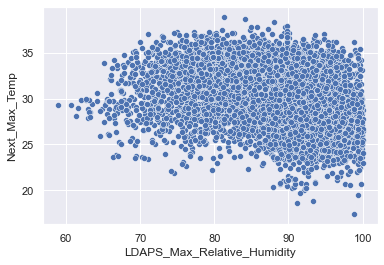

In [32]:
sn.scatterplot(data=df, x="LDAPS_Max_Relative_Humidity", y="Next_Max_Temp") 

<AxesSubplot:xlabel='LDAPS_Min_Relative_Humidity', ylabel='Next_Max_Temp'>

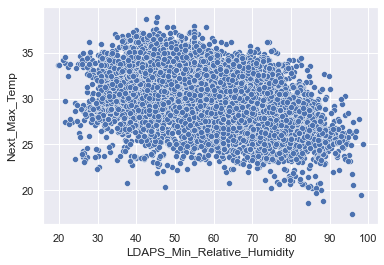

In [33]:
sn.scatterplot(data=df, x="LDAPS_Min_Relative_Humidity", y="Next_Max_Temp") 

<AxesSubplot:xlabel='LDAPS_Min_Relative_Humidity', ylabel='Next_Min_Temp'>

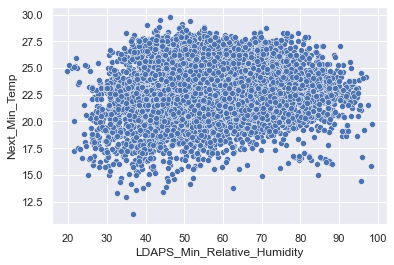

In [34]:
sn.scatterplot(data=df, x="LDAPS_Min_Relative_Humidity", y="Next_Min_Temp") 

<AxesSubplot:xlabel='LDAPS_Max_Relative_Humidity', ylabel='Next_Min_Temp'>

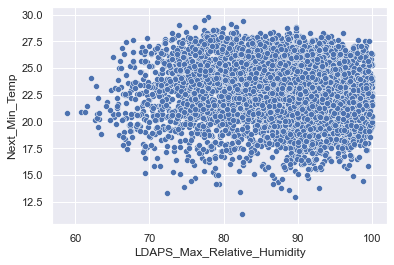

In [35]:
sn.scatterplot(data=df, x="LDAPS_Max_Relative_Humidity", y="Next_Min_Temp") 

#### Observation: We can see from the above plots that the plots data is almost Linear and Normally distributed

In [36]:
#Finding Co relation for all the columns
cor =df.corr()

<AxesSubplot:>

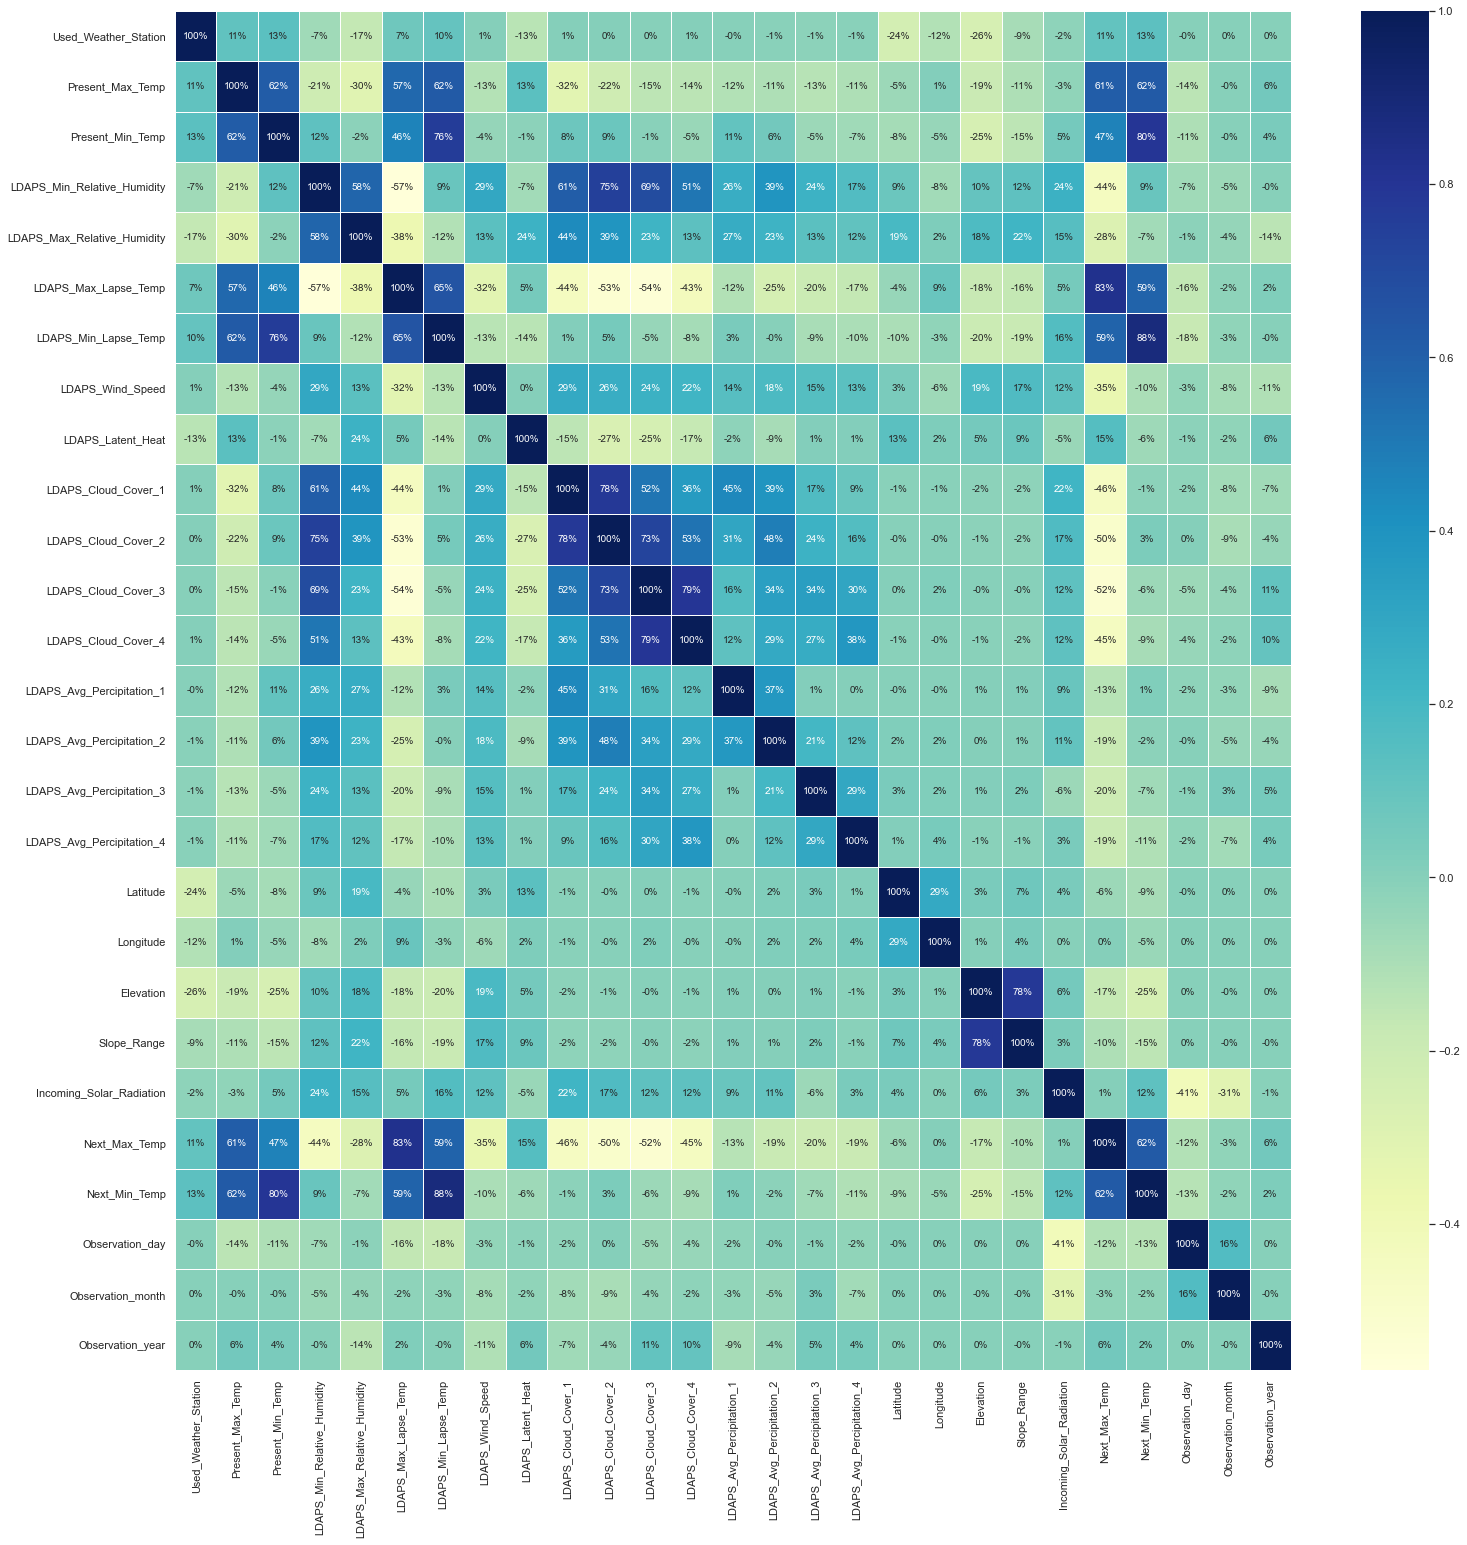

In [37]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white',cmap="YlGnBu",fmt='.0%')

In [38]:
df.shape

(7750, 27)

In [39]:
df_full=df[['Next_Max_Temp','Next_Min_Temp']]
df_full.head()

Next_Max_Temp  Next_Min_Temp
0           29.1           21.2
1           30.5           22.5
2           31.1           23.9
3           31.7           24.3
4           31.2           22.5

### Multi Output Regression Model in Python.

In [40]:
from sklearn.datasets import make_regression

In [41]:
## Create the dataset
X,y = make_regression(n_samples=1500,n_informative=15,n_features=27,n_targets=2)

In [42]:
#create x and y variables
X = df.drop(columns=['Next_Max_Temp','Next_Min_Temp'], axis=1)
y = df_full.copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
df= scaler.fit_transform(df.astype(np.float64))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (6200, 25)
Shape of X_test : (1550, 25)
Shape of y_train : (6200, 2)
Shape of y_test : (1550, 2)


In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    training_start = time.perf_counter()
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    print("Training score: {}".format(model.score(X_train,y_train)*100))
    predictions = model.predict(X_test)
    prediction_end = time.perf_counter()
    print("Predictions are: {}".format(predictions))
    print('\n')
    model_train_time = training_end-training_start
    model_prediction_time = prediction_end-prediction_start
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score*100))
    
    print("Time consumed for training: %4.3f" % (model_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (model_prediction_time))     
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sn.distplot(y_test-predictions) 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 98.59803205462143
Predictions are: [[30.116 21.782]
 [32.855 22.852]
 [34.695 24.955]
 ...
 [27.695 20.858]
 [34.83  27.11 ]
 [33.889 22.31 ]]


r2 score is: 90.34641899978342
Time consumed for training: 8.309
Time consumed for prediction: 0.23922 seconds
MAE:0.6534748387096772
MSE:0.741844019999999
RMSE:0.8613036746699733


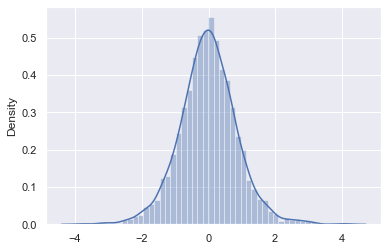

In [46]:
# Predict Flight fare using RandomForestRegressor
rf=RandomForestRegressor()
predict(rf)

Model is: LinearRegression()
Training score: 80.11792357839202
Predictions are: [[29.44382162 21.53423769]
 [33.69802707 23.50442546]
 [32.77935255 24.87526217]
 ...
 [28.64264904 22.10613107]
 [34.5585443  27.50227213]
 [30.12567397 22.1169759 ]]


r2 score is: 80.18664345458279
Time consumed for training: 0.039
Time consumed for prediction: 0.01556 seconds
MAE:0.938111571026865
MSE:1.5780745121610835
RMSE:1.2562143575684381


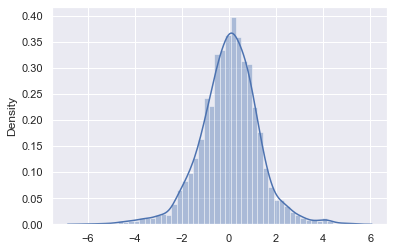

In [47]:
lr=LinearRegression()
predict(lr)

Model is: KNeighborsRegressor()
Training score: 70.24824780533183
Predictions are: [[30.18 22.2 ]
 [29.9  21.5 ]
 [34.56 24.4 ]
 ...
 [31.54 24.06]
 [33.86 26.88]
 [32.5  22.62]]


r2 score is: 51.50311269911364
Time consumed for training: 0.014
Time consumed for prediction: 1.78873 seconds
MAE:1.4900064516129028
MSE:3.719938193548385
RMSE:1.9287141295558512


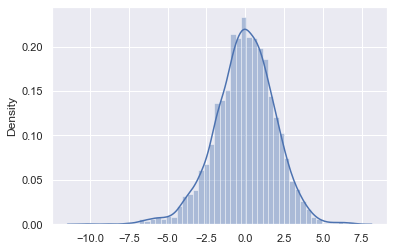

In [48]:
# Predict Flight fare using
kn=KNeighborsRegressor()
predict(kn)

Model is: DecisionTreeRegressor()
Training score: 100.0
Predictions are: [[29.6 22.6]
 [32.  22.7]
 [34.4 26. ]
 ...
 [27.5 20.3]
 [35.4 26.8]
 [34.5 22.1]]


r2 score is: 76.35481869426837
Time consumed for training: 0.201
Time consumed for prediction: 0.01687 seconds
MAE:0.9772580645161287
MSE:1.8240032258064511
RMSE:1.350556635541972


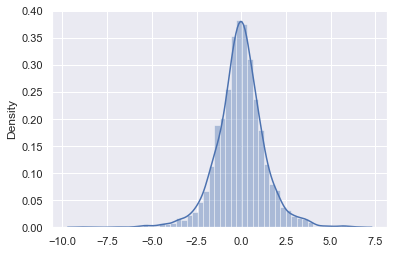

In [49]:
# Predict Flight fare using
dt=DecisionTreeRegressor()
predict(dt)

### Hypertunning the model

###### In this grid search I will try different combinations of RF hyperparameters.

###### Most important hyperparameters of Random Forest:

###### n_estimators = n of trees
###### max_features = max number of features considered for splitting a node
###### max_depth = max number of levels in each decision tree
###### min_samples_split = min number of data points placed in a node before the node is split
###### min_samples_leaf = min number of data points allowed in a leaf node
###### bootstrap = method for sampling data points (with or without replacement)

#### Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [51]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.021720989306458 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.9839108809770336 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.998197001760655 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.9688620114991482 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.9364702602790421 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.8699672044245079 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.9235990262502027 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.8779012649311664 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.9342959916429056 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.8836999461574668 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.928012796247983 {'bootstrap': True, 'max_d

In [52]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=5,
                      n_estimators=25)

In [53]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of Next_Max_Temp    100.0
Next_Min_Temp    100.0
dtype: float64 %


In [54]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


In [55]:
round(r2_score(y_train,grid_best)*100,2)

100.0

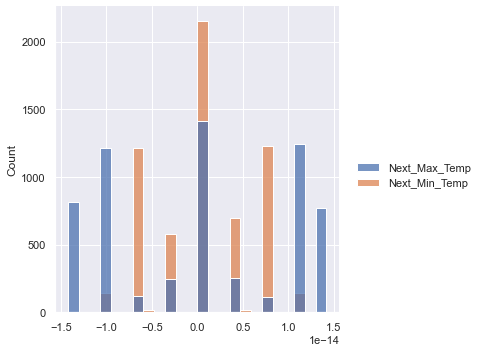

In [56]:
#distribution plot between actual value and predicted value
sn.displot(y_train-grid_best)

#### Randomized Search

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [59]:
pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [60]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

2.244720000695175 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
2.2392709394625436 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.8994016954635663 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.9671554101889444 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
2.224091240406368 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.8552832971804838 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.8567360277405678 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.9421805703646762 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
2.2270219311777533 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.8990981143755271 {'n_estimators': 110, 'min_sample

In [62]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [63]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 45}

In [64]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [65]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of Next_Max_Temp    98.86
Next_Min_Temp    98.68
dtype: float64 %


In [66]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.42


In [67]:
round(r2_score(y_train,random_best)*100,2)

97.74

#### After hypertuning,the accuracy increases

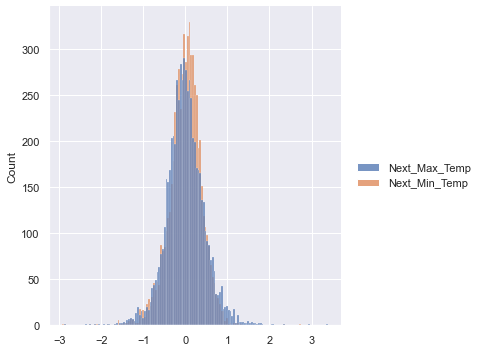

In [68]:
#distribution plot between actual value and predicted value
sn.displot(y_train-random_best)

#### Observation: We can see from the above plot that the predicted data is perfectly normally distributed

In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

* Grid-search:
* RMSE: 0.0
* Accuracy Next_Max_Temp (MAPE): 100.0 %
* Accuracy Next_Min_Temp (MAPE): 100.0 %
* r2 Score:100.0
* Randomized Search:
* RMSE: 0.42
* Accuracy Next_Max_Temp (MAPE): 98.86 %
* Accuracy Next_Min_Temp (MAPE): 98.68 %
* r2 Score:97.75
    
This of course does not mean that the randomized-search. is inherently inferior to  grid search .
Its just that in this notebook I used the information provided by the former to refine the latter.
In any case, this time I will consider the model obtained by the grid search as the best one.
First I will plot the feature importance for this model. 
This will give me precious insight to the most important factor in predicting our dependent variable Price. 
Then I will apply the model to the test set.

##### Feature Importance

In [69]:
# extract the numerical values of feature importance from the grid search
importances = grid_search_forest.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                      feature
0     0.194092         LDAPS_Min_Lapse_Temp
1     0.187314         LDAPS_Max_Lapse_Temp
2     0.112203             Present_Min_Temp
3     0.097410             Present_Max_Temp
4     0.052327          LDAPS_Cloud_Cover_3
5     0.043042          LDAPS_Cloud_Cover_2
6     0.036524     Incoming_Solar_Radiation
7     0.035852  LDAPS_Min_Relative_Humidity
8     0.033795          LDAPS_Cloud_Cover_1
9     0.029420          LDAPS_Cloud_Cover_4
10    0.023861    LDAPS_Avg_Percipitation_2
11    0.021022              Observation_day
12    0.020845             LDAPS_Wind_Speed
13    0.017638             Observation_year
14    0.012898    LDAPS_Avg_Percipitation_1
15    0.012831            Observation_month
16    0.012651    LDAPS_Avg_Percipitation_4
17    0.010597  LDAPS_Max_Relative_Humidity
18    0.009323    LDAPS_Avg_Percipitation_3
19    0.008341            LDAPS_Latent_Heat
20    0.007289                    Elevation
21    0.005990         Used_Weat

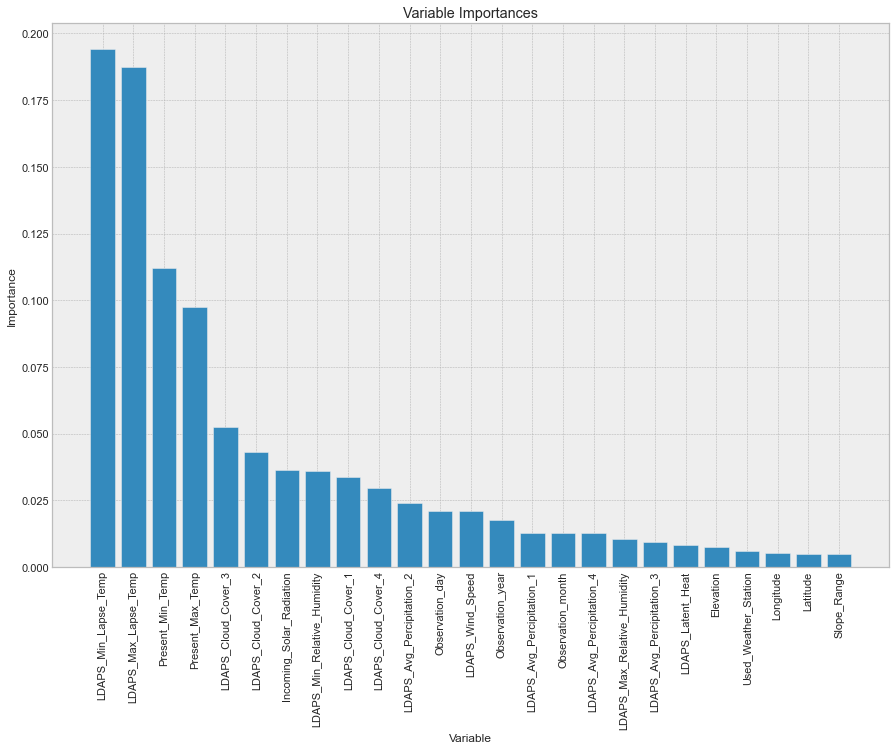

In [70]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

* Observation:A future aim may be to cut the less relevant features (lets say we can drop some columns in terms of importance), estimate a new model and compare it with the old ones.
* I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the Next_Max_Temp & Next_Min_Temp are Type of LDAPS_Max_Lapse_Temp & LDAPS_Min_Lapse_Temp. 
* After LDAPS_Max/Min_Lapse_Temp there is a group of 8 features including: LDAPS_Cloud_Cover_1, LDAPS_Cloud_Cover_2,LDAPS_Cloud_Cover_3, LDAPS_Cloud_Cover_4,Present_Max_Temp, Present_Min_Temp,Incoming_Solar_Radiation & LDAPS_Min_Relative_Humidity.
* Slope_Range is the least relevant feature in this cluster.

#### Evaluate best model on the test set

In [71]:
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.78


In [72]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of Next_Max_Temp    97.85
Next_Min_Temp    97.62
dtype: float64 %


### As was to be expected, the performance drops a bit, but is still beyond 97%, which I consider a discrete result.

In [73]:
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(final_model)
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded model to make predictions
y_pred_test_Forestreg=Final_mod_from_pickle.predict(X)
y_pred_test_Forestreg

array([[29.48 , 21.404],
       [30.5  , 22.5  ],
       [31.1  , 23.9  ],
       ...,
       [28.3  , 18.1  ],
       [28.292, 18.052],
       [27.948, 17.84 ]])

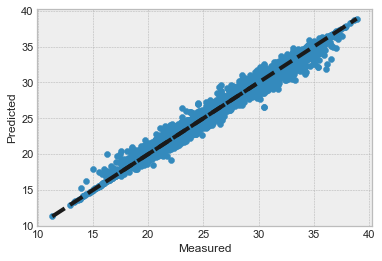

In [74]:
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validated:
predicted = y_pred_test_Forestreg

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion:
#### * Columns like  LDAPS_Max_Lapse_Temp , LDAPS_Min_Lapse_Temp,LDAPS_Cloud_Cover_1, LDAPS_Cloud_Cover_2,LDAPS_Cloud_Cover_3, LDAPS_Cloud_Cover_4,Present_Max_Temp, Present_Min_Temp,Incoming_Solar_Radiation & LDAPS_Min_Relative_Humidity have effect to reliably predict the Next_Max_Temp & Next_Min_Temp.
#### * Having Present_Max_Temp & Present_Min_Temp can significantly effect the Next_Max_Temp, Next_Min_Temp & predicting it.
#### * The Actual vs Predicted plot clearly indicates the predicted values are very much linear hence performance of model is considerably Good
#### * Random Forest Regressor model predicts the Next_Max_Temp & Next_Min_Temp more accurately than linear regression model